### 9-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

(1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target)

(2) 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
X = np.array(df_X)

(3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
y = np.array(df_y).ravel()

(4) train 데이터와 test 데이터로 분리하기

- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


(5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [5]:
np.random.seed(42)
W = np.random.rand(10)
b = np.random.rand()


def model(X):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

(6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.

In [6]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse


def loss(X, y):
    predictions = model(X)
    L = MSE(predictions, y)
    return L

(7) 기울기를 구하는 gradient 함수 구현하기

- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [7]:
def gradient(X, y):
    N = len(y)
    # y_pred 준비
    y_pred = model(X)
    # 공식에 맞게 gradient 계산
    dW = (1/N) * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

(8) 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [8]:
lr = 0.0005

(9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [9]:
loss_list = []

for epoch in range(2000):
    dW, db = gradient(X_train, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, y_train)
    loss_list.append(L)
    if epoch % 100 == 1:
        print(f'Epoch {epoch}, Loss {L:0.4f}')

Epoch 1, Loss 29595.6842
Epoch 101, Loss 25323.2297
Epoch 201, Loss 21824.8855
Epoch 301, Loss 18960.2653
Epoch 401, Loss 16614.4421
Epoch 501, Loss 14693.3315
Epoch 601, Loss 13119.9115
Epoch 701, Loss 11831.1283
Epoch 801, Loss 10775.3633
Epoch 901, Loss 9910.3589
Epoch 1001, Loss 9201.5211
Epoch 1101, Loss 8620.5296
Epoch 1201, Loss 8144.2003
Epoch 1301, Loss 7753.5534
Epoch 1401, Loss 7433.0513
Epoch 1501, Loss 7169.9739
Epoch 1601, Loss 6953.9083
Epoch 1701, Loss 6776.3299
Epoch 1801, Loss 6630.2598
Epoch 1901, Loss 6509.9852


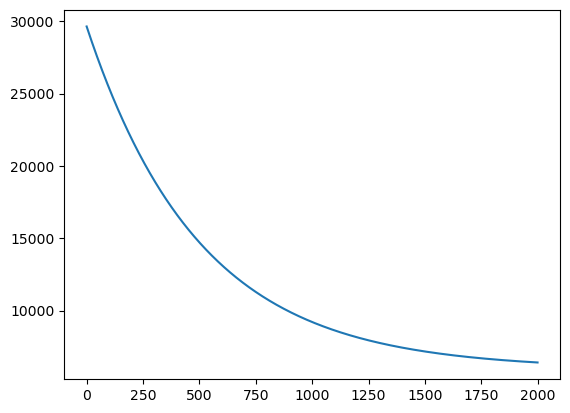

In [10]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

(10) test 데이터에 대한 성능 확인하기

- test 데이터에 대한 성능을 확인해주세요.

In [11]:
pred = model(X_test)
mse = loss(X_test, y_test)
mse

5378.685097113434

(11) 정답 데이터와 예측한 데이터 시각화하기

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

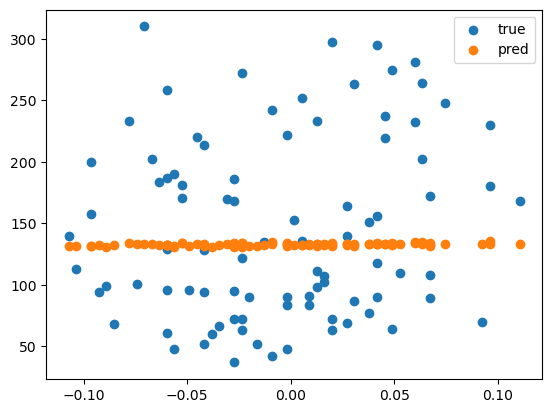

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], pred, label='pred')
plt.legend()
plt.show()

<Axes: >

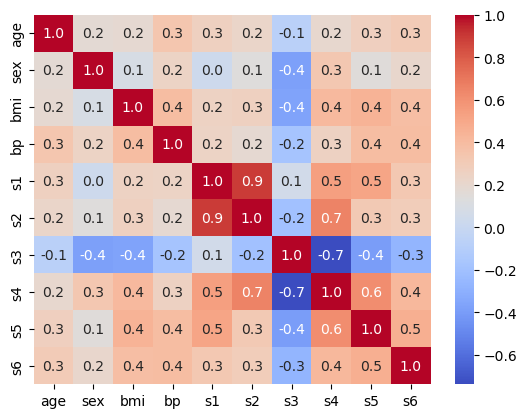

In [13]:
import seaborn as sns
sns.heatmap(df_X.corr(), annot = True, fmt='.1f', cmap='coolwarm')

In [14]:
from sklearn.decomposition import PCA

group = df_X[['s1','s2','s3','s4']]

pca= PCA(n_components=2)

group_pca = pca.fit_transform(group)

print(pca.explained_variance_ratio_.sum())

0.9606195379348956


In [15]:
df_X_pca = df_X.drop(['s1', 's2', 's3', 's4',], axis=1)

df_X_pca['pca1'] = group_pca[:, 0]
df_X_pca['pca2'] = group_pca[:, 1]

In [16]:
X = np.array(df_X)
y = np.array(df_y).ravel()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

np.random.seed(42)
W = np.random.rand(10)
b = np.random.rand()


def model(X):
    predictions = 0
    for i in range(8):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse


def loss(X, y):
    predictions = model(X)
    L = MSE(predictions, y)
    return L


def gradient(X, y):
    N = len(y)
    # y_pred 준비
    y_pred = model(X)
    # 공식에 맞게 gradient 계산
    dW = (1/N) * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


lr = 0.0005

loss_list = []

for epoch in range(3000):
    dW, db = gradient(X_train, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, y_train)
    loss_list.append(L)
    if epoch % 100 == 1:
        print(f'Epoch {epoch}, Loss {L:0.4f}')

Epoch 1, Loss 29600.8928
Epoch 101, Loss 25329.8985
Epoch 201, Loss 21832.9717
Epoch 301, Loss 18969.7338
Epoch 401, Loss 16625.2642
Epoch 501, Loss 14705.4834
Epoch 601, Loss 13133.3738
Epoch 701, Loss 11845.8846
Epoch 801, Loss 10791.4000
Epoch 901, Loss 9927.6644
Epoch 1001, Loss 9220.0855
Epoch 1101, Loss 8640.3446
Epoch 1201, Loss 8165.2584
Epoch 1301, Loss 7775.8481
Epoch 1401, Loss 7456.5766
Epoch 1501, Loss 7194.7248
Epoch 1601, Loss 6979.8799
Epoch 1701, Loss 6803.5177
Epoch 1801, Loss 6658.6598
Epoch 1901, Loss 6539.5933
Epoch 2001, Loss 6441.6415
Epoch 2101, Loss 6360.9757
Epoch 2201, Loss 6294.4617
Epoch 2301, Loss 6239.5334
Epoch 2401, Loss 6194.0904
Epoch 2501, Loss 6156.4130
Epoch 2601, Loss 6125.0935
Epoch 2701, Loss 6098.9794
Epoch 2801, Loss 6077.1271
Epoch 2901, Loss 6058.7645


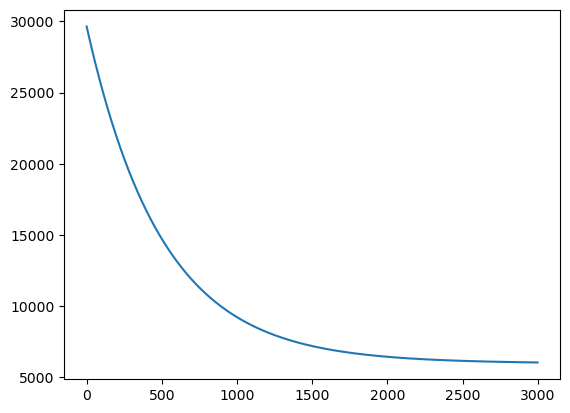

In [18]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

In [19]:
pred = model(X_test)
mse = loss(X_test, y_test)
mse

5214.178394174722

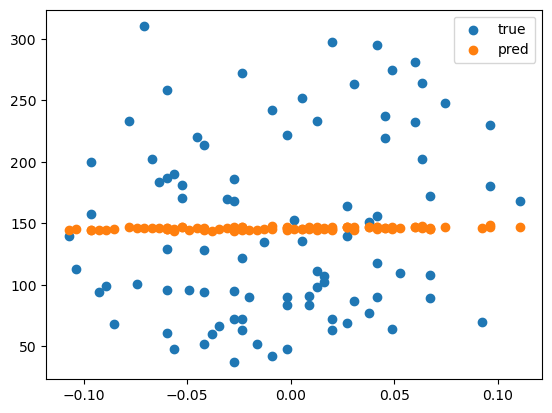

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], pred, label='pred')
plt.legend()
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse

2900.1936284934804

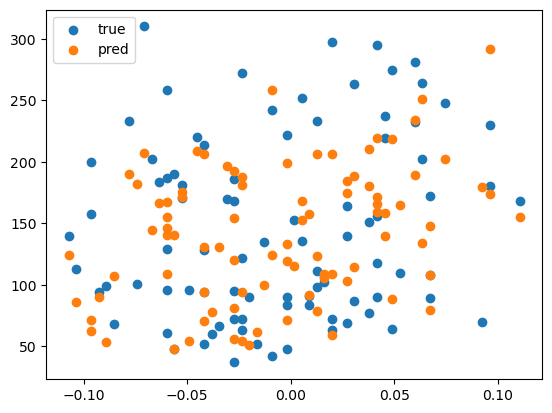

In [24]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], pred, label="pred")
plt.legend()
plt.show()

상관관계가 높은 변수들을 제거하려고 PCA를 통해 변수를 줄였는데도 생각보다 loss가 줄지 않았다.
이렇게 모델을 만들면 비효율적이라는 생각을 했다.
그래서 scikitlearn에서 제공하는 linearRegression을 통해 학습을 진행했더니 3000이하로 나왔다.